<a href="https://colab.research.google.com/github/tshabalalasibongile/machine-learning-chemistry-projects/blob/main/solubility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sibongile Tshabalala 2356121

# Solubility Prediction

# About Dataset

The Delaney dataset contains a collection of chemical compounds along with their experimentally determined solubility values. Each compound is represented by its chemical structure in SMILES notation.

The goal is to develop a predictive model that estimates solubility based on molecular structure.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "solubility.csv"
df = pd.read_csv(file_path)

In [ ]:
df

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...
1123,halothane,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


Based on the exploration of the dataset .info() revealed that the dataset contains 1128 compounds and 9 columns, including Compound ID, smiles, numnerical molecular descriptors, and the solubility target LogoS.

# Data exploration and preprocessing

In [ ]:
#overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


In [ ]:
df.describe()

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


The statistical summary from .describe() revealed the distributions, ranges, and potential anomalies in the numerical features. This helped identify skewed variables and extreme values that could influence model performance.

In [ ]:
df.isnull().sum()

,0
Compound ID,0
Minimum Degree,0
Molecular Weight,0
Number of H-Bond Donors,0
Number of Rings,0
Number of Rotatable Bonds,0
Polar Surface Area,0
measured log solubility in mols per litre,0
smiles,0


Most columns were numerical with no missing values detected confirming that the dataset was complete and ready for analysis.

# Histogram visualization of numerical features

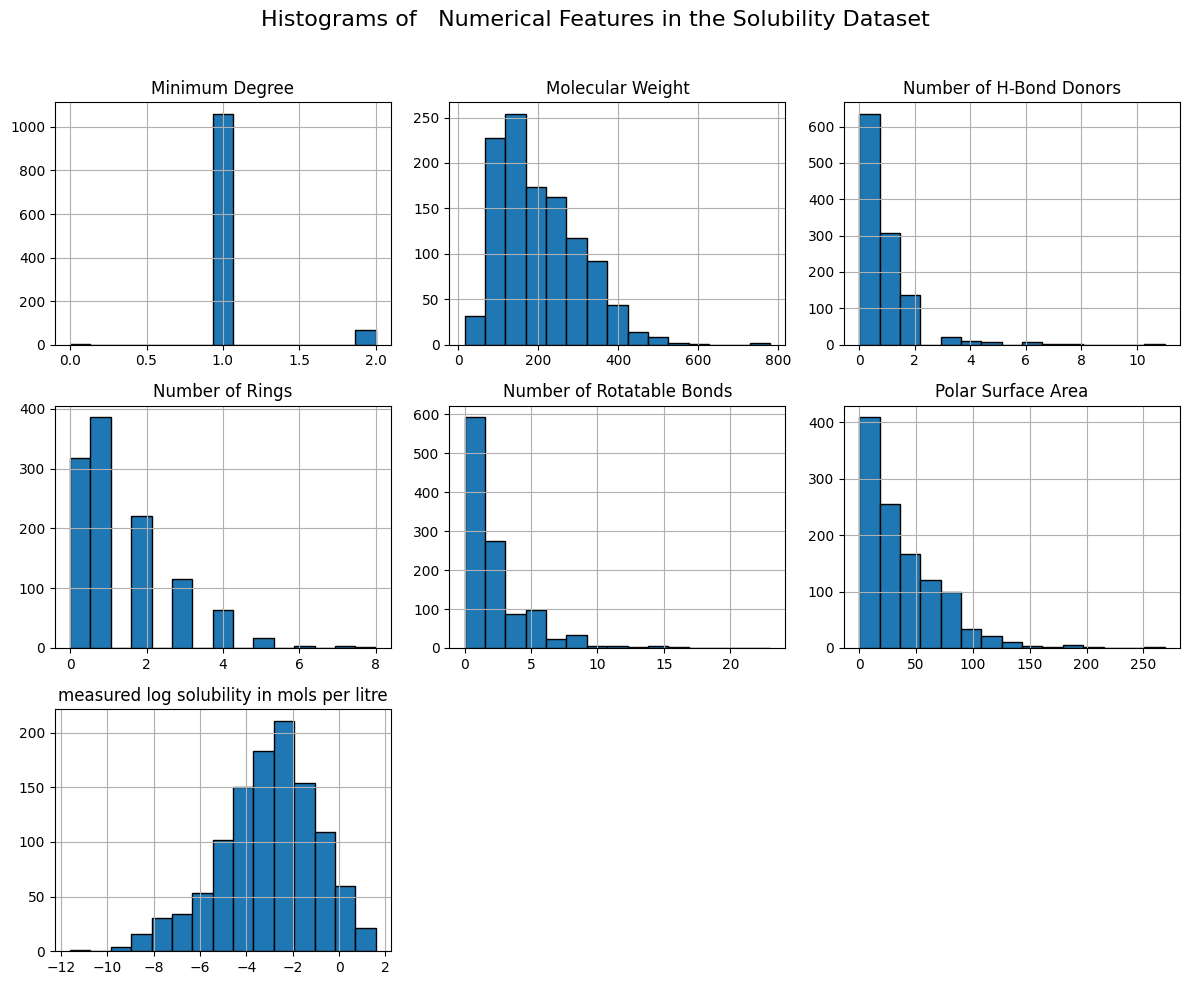

In [ ]:
df.drop(columns=['Compound ID', 'smiles']).hist(bins=15, figsize=(12, 10), layout=(3,3), edgecolor='black')
plt.suptitle('Histograms of   Numerical Features in the Solubility Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The histogram above shows the distribution of the numerical features from the solubility dataset. The **Minimum Degree** feature indicates the most compounds have atoms with a minimum degree of **1 or 2**, suggesting simpler molecular connectivity among the compounds.

The **Molecular Weight** feature shows a fairly normal but slightly right-skewed distribution, with the majority of compounds clustering around **200-300 g/mol**.

For the **Number of H-Bond Donors**, most compounds have fewer than 5 donors, with **0** being the most frequent value, indicating that a large proportion of compounds do not form hydrogen bonds readily.

The Number of Rings feature shows that most compounds contain between **0 and 5 rings,** again demonstrating a right-skewed distribution.

Similarly, the **Number of Rotatable Bonds** feature reveals that many compounds have **between 0 and 5 rotatable bonds**, consistent with flexible but moderateky complex molecular structures.

The **Polar Surface Area** feature spans a wide range of values but shows noticeable clustering between **0 and 100**, representing compounds with varying degrees of polarity. In contrast, the **Measured Log Solubility (LogS)**, the target variable displays nearly normal distribution, slightly **skewed to the left**, with most solubility values falling between **-3 and 1**. This indicates that while most compounds exhibit moderate solubility, a few highly soluble compounds exist in the dataset.

Overall, each histogram reveals distinct data patterns and ranges, with all features showing the presence of **outliers**.

# Boxplots to visualize outliers

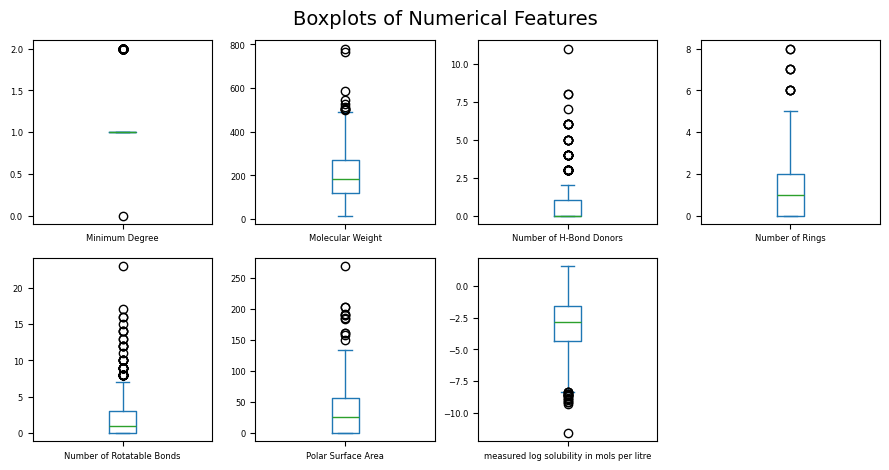

In [ ]:
df.drop(columns=['Compound ID', 'smiles']).plot(kind='box', subplots=True, layout=(4, 4), fontsize=6, figsize=(9, 9))
plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

The boxplots above provide a clearer visualization of the **spread, central tendency, and presence of outliers** for rach numerical feature in the solubility dataset. Each box represents the interquartile range (IQR) showing where the middle 50% of the data lies, while the whiskers and individual points highlight the range and any extreme values.

From the plots, it is evident that several features, such as Molecular Weight, Polar Surface Area, and the Number of Rotatable Bonds, contain numerous outliers, indicationg that a small subset of compounds have much higher values than the majority. This aligns with the right-skewed distributions observed in the histograms, where most compounds are concentrated at lower values with a few extreme cases on the higher end.

Features like **Number of Rings, Number of H-Bond Donors, and Number of H-Bond Acceptors** show **tigher box ranges** with discrete steps, reflecting their nature as count-based molecular descriptors. These features generally exhibit smaller variability but still include occasional outliers representing more structurally complex compounds.

The boxplots confirm that while most molecular features fall within consistent ranges, there are significant variations and outliers across several descriptors. These differences are important to consider in model training, as they may influence regression performance and highlight the chemical diversity of the dataset.


# Renaming and preparing data for model training

In [ ]:
#Renaming the target column
df.rename(columns={'measured log solubility in mols per litre': 'LogS'}, inplace=True)
df.columns

Index(['Compound ID', 'Minimum Degree', 'Molecular Weight',
       'Number of H-Bond Donors', 'Number of Rings',
       'Number of Rotatable Bonds', 'Polar Surface Area', 'LogS', 'smiles'],
      dtype='object')

In [ ]:
#Converting categorical columns into numerical indexes
df['CompoundID_index'] = df['Compound ID'].astype('category').cat.codes
df['smiles_index'] = df['smiles'].astype('category').cat.codes

In [ ]:
#Define features (X) and target (y)
X = df.drop(columns=['Compound ID', 'smiles', 'LogS'])
y = df['LogS']

In [ ]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Initialising the StandardScaler
# and standardising the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (902, 8)
Testing set size: (226, 8)


# Model Selection (Linear Regression)

In [ ]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Initialize and train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

For the solubility prediction task, a **Linear regression model** was selected as the initial predictive algorithm. This model was chosen due to its simplicity, interpretability, and effectiveness in modeling linear relationships between molecular descriptors and solubility (LogS). Linear regression serves as a strong baseline model, allowing the identification of how individual chemical features contribute to solubility before experimenting with more complex approaches such as Random Forest or Support Vector Regression.

The model was initialized using the LinearRegression() function from the scikit-learn library and then trained on the training subset (X_train, y_train). During training, the model calculated the optimal set of coefficients for each feature by minimizing the sum of squared differences between predicted and actual solubility values.

No errors or warningd were produced during model fitting, confirming that the training process executed successgully. The model effectively learned a set of weight parameters that define how each molecular descriptor affects the predicted solubility value.

This step marks the transition from data preparation to predictive analysis. By completing the training phase, the Linear Regression model was noe ready to generate solubility predictions on the test dataset, allowing for an objective evaluation of itd accuracy and generalization performance.

# Model Evaluation

In [ ]:
#make predictions
y_pred = linear_model.predict(X_test)

In [ ]:
#evaluate model preformance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.4505842726478444
Root Mean Squared Error (RMSE): 1.2044020394568602
R-squared (R2) Score: 0.6931151726797289


The MSE represents the average squared difference between the actual and predicted solubility values. A lower MSE indicates that the predictions are relatively close to the true values, suggesting a reasonably accurate model.

The RMSE, which is the square root of MSE, provides the error in the same units as the target variable. An RMSE of approximately 1,20 suggests that on average the model's solubility predictions deviate by about one unit from actual measured values.

The R2 score of 0.6893 indicates that around 69.3% of the variance in solubility can be explained by the model. This shows a strong relationship between the input molecular features and the solubility outcomes, demonstrating that the model captures the majority of the trend in the data.

Overall, these results suggest that Linear regression model performs fairly well in predicting solubility with a good balance between accuracy and interpretability. While there is still room for improvement, the model provides meaningful insights into how molecular properties influence solubility.

# Comparing Actual vs Predicted Values

In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
1091,-2.540,-1.307050
898,-2.253,-2.127200
739,-2.484,-1.954793
140,-2.540,-1.238513
1019,-7.200,-6.051838
...,...,...
336,-4.600,-4.055755
429,-5.259,-9.034601
12,-2.680,-1.885552
1036,-2.593,-2.311796


# Visualization of Model Performance

Text(0.5, 1.0, 'Actual vs Predicted Solubility')

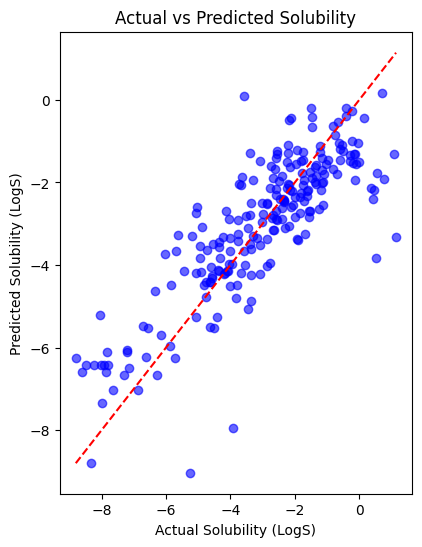

In [ ]:
plt.figure(figsize=(10, 6))

#Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Solubility (LogS)')
plt.ylabel('Predicted Solubility (LogS)')
plt.title('Actual vs Predicted Solubility')

A scatter plot compared the predicted LogS values to the actual measured LogS values. The red regression line represented the model's best fit, while the red dashed 1:1 line indicated perfect prediction. Points closely following the 1:1 line suggest that the model's predictions are accurate, whereas wider scatter reflects greater prediction error.

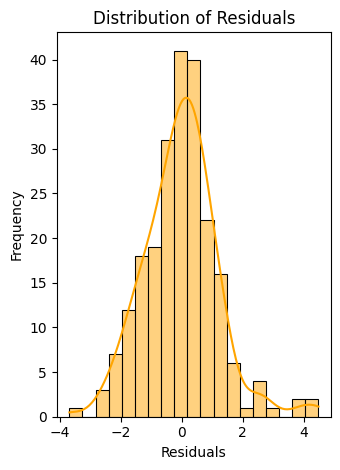

In [ ]:
#Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The residuals (differences between actual and predicted values) were visualized using a histogram with a kernel density overlay. A roughly symmetric, bell-shaped residual distribution centred around zero indicates good model performance and minimal bias. Skewed or wide residuals, in contrast, suggest underfitting or data variability not captured by the linear model.



# Feature Importance

In [ ]:
# Acquiring fearure importance for the dataset
feature_importance = pd.Series(linear_model.coef_)

# creating a dataframe for better visualization
importances_df = pd.DataFrame({'Feature': X.columns, 'Linear_Model_Importance': feature_importance})
importances_df

,Feature,Linear_Model_Importance
0,Minimum Degree,-0.064284
1,Molecular Weight,-1.376650
2,Number of H-Bond Donors,0.142346
3,Number of Rings,-0.538075
4,Number of Rotatable Bonds,-0.416980
5,Polar Surface Area,1.045189
6,CompoundID_index,0.143353
7,smiles_index,-0.097823


In [ ]:
#extracting coefficients for each feature
feature_importance = pd.Series(linear_model.coef_, index=X.columns)

#create dataframe fro visualisation
importances_df = pd.DataFrame({'Feature': feature_importance.index, 'Importance': feature_importance.values})

#sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
5,Polar Surface Area,1.045189
6,CompoundID_index,0.143353
2,Number of H-Bond Donors,0.142346
0,Minimum Degree,-0.064284
7,smiles_index,-0.097823
4,Number of Rotatable Bonds,-0.416980
3,Number of Rings,-0.538075
1,Molecular Weight,-1.376650


# Bar chart of feature importance

/tmp/ipython-input-2012251284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


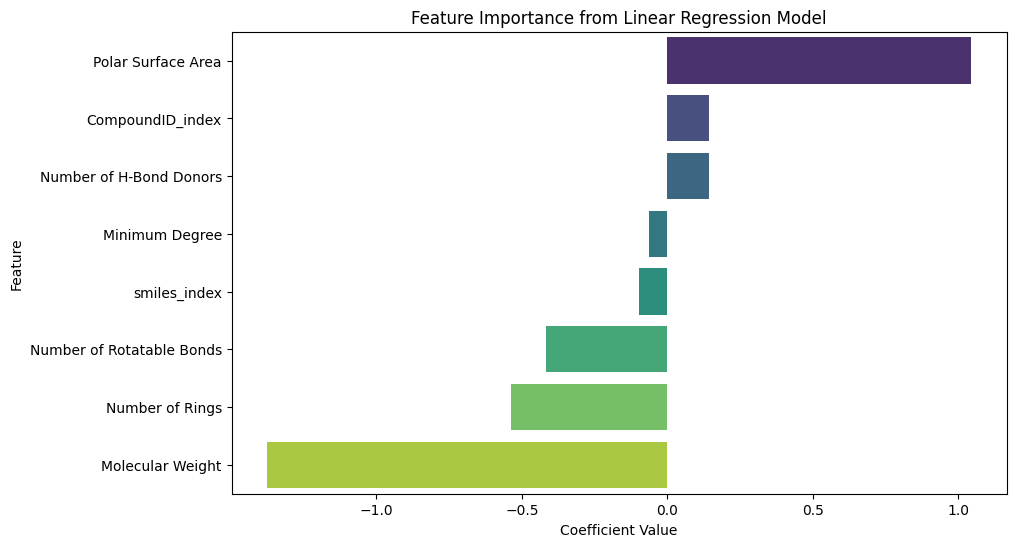

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance from Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

The extracted coefficients revealed that Polar Surface Area had the largest positive impact on predicted solubility. In contrast, Molecular Weight and Number of Rings had negative coefficients, indicating that increases in these features decrease predicted solubility.

The bar plot of coefficients confirmed these trends visually with Polar Surface Area and related polarity features standing out, while features with minimal influence had cofficients near zero.

These findings align with chemical intuition: molecules with properties that enhance polarity or hydrogen bonding tend to be more soluble, while larger, heavier, or more structurally constrained molecules are less soluble.

# Discussion

The linear regression model captured a substantial portion of the variance in solubility (R2 ~ 0.69) but may struggle with nonlinear relationships inherent in molecular structures. Quantitative metrics (R2 and RMSE) and visual assessments (scatter and residual plots) both confirm that the model performs adequately, though not perfectly.

Limitations include:
1. Difficulty capturing nonlinear relationships between chemical features and solubility.
2. Extreme values in features like Molecular Weight contributing to larger prediction errors.
3. Simplistic enroding of SMILES and Compound ID may miss structural nuances.

Potential improvements involve exploring nonlinear models (Random Forest, Gradient Boosting, SVR, or neutral networks), performing feature engineering, reducing multicollinearity, or applying robust scaling and outlier treatment for skewed descriptors.

# Conclusion

The Linear Regression model demonstrates a solid ability to predict compound solubility based on molecular features, achieving an R2 score of 0.693, an MSE of 1.45, and an RMSE of 1.20. These results indicate that the model explains approximately 69% of the variation in solubility values, showing that the selected features effectively capture the underlying patterns influencing solubility.

Although there is some prediction error, the model performs well given the complexity of chemical interactions that affect solubility. The outcomes suggest that molecular descriptors such as polar surface area, molecular weight and the number of hydrogen bond donors and rings play significant roles in determining solubility.

The model provides meaningful predictive power and chemical insights, serving as a reliable baseline for solubility prediction. Further improvements could be achieved by exploring non-linear models, feature engineering, or regularizatio techniques to capture more complex molecular relationships.